This notebook explores some parts of Chapter 1.
<http://neuralnetworksanddeeplearning.com/chap1.html>

In [23]:
import numpy as np

In [24]:
class Network(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) 
                        for x, y in zip(sizes[:-1], sizes[1:])]

In [50]:
net = Network((7, 3, 9))

In [51]:
net.sizes

(7, 3, 9)

In [52]:
net.num_layers

3

In [53]:
net.biases

[array([[ 1.04876228],
        [-1.52492371],
        [-1.94144698]]), array([[ 0.08646755],
        [ 0.26554866],
        [ 0.82912462],
        [-0.23751675],
        [ 0.0055228 ],
        [-0.32554766],
        [-0.74425774],
        [ 1.11819478],
        [ 0.16395308]])]

In [54]:
net.weights

[array([[-1.21714106,  3.34012811,  0.40608636, -0.04569658, -1.21487492,
          0.48467913,  0.83020414],
        [-0.67446829, -0.05429485, -0.37575735, -1.32064302,  1.98613777,
          1.25483987, -1.05497753],
        [ 1.43958024, -0.31196707, -0.60515465, -0.32599393,  1.15557947,
          1.27102858,  0.78536165]]),
 array([[-0.7135115 , -1.17092533, -0.97057983],
        [ 0.82173256, -1.39122298, -0.13570146],
        [ 1.26746234, -0.71967773, -1.40732289],
        [ 0.18737222,  0.38462339,  0.27597119],
        [ 0.23336378,  0.44917769,  1.31535649],
        [ 0.65548538,  0.18486913,  0.53099801],
        [-0.26139401,  2.15095484, -1.29475463],
        [ 0.35967878,  0.59469401,  0.42413905],
        [ 1.79218593, -0.31791879, -3.00328242]])]

Shape of weights:

In [55]:
for w in net.weights:
    print(w.shape)

(3, 7)
(9, 3)


Due to the dot product (notation $W$ for weight matrix, $a$ for activations vector), the shape is $(\text{number of neurons in next layer}, \text{number of neurons in previous layer})$

$$
\sigma((\sum_{k=1}^l  W_{ik} a_k ) + b_i)= a'_i
$$

We can also draw this net:

In [62]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [63]:
%matplotlib inline

In [64]:
def draw(net):
    "Draws a neural network using circles."
    radius = 0.1
    for ind, layer in enumerate(net.sizes):
        x = np.linspace(0, 1, num=net.num_layers)[ind]
        for y in np.linspace(0, 1, num=layer):
            plt.gca().add_artist(plt.Circle((x, y), radius=radius))

(-0.5, 1.5)

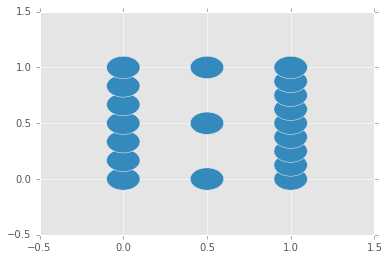

In [65]:
plt.figure()
draw(net)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

In [66]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [84]:
def feedforward(self, a, debug=False):
        """Return the output of the network if "a" is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
            if debug:
                print(a)
        return a

In [85]:
Network.feedforward = feedforward

In [86]:
net = Network((7, 3, 9))

In [94]:
a = np.array([1, 1, 1, 1, 1, 1, 1])[:, np.newaxis]

In [95]:
np.dot(net.weights[0], a)

array([[ 2.03979286],
       [-1.41738007],
       [ 1.69637504]])

In [96]:
net.feedforward(a, debug=True)

[[ 0.84501088]
 [ 0.09073372]
 [ 0.75631664]]
[[ 0.28551197]
 [ 0.8998925 ]
 [ 0.04789621]
 [ 0.80908021]
 [ 0.85838363]
 [ 0.41490244]
 [ 0.45653788]
 [ 0.81108063]
 [ 0.12728428]]


array([[ 0.28551197],
       [ 0.8998925 ],
       [ 0.04789621],
       [ 0.80908021],
       [ 0.85838363],
       [ 0.41490244],
       [ 0.45653788],
       [ 0.81108063],
       [ 0.12728428]])

In [73]:
def SGD(self, training_data, epochs, mini_batch_size, eta,
        test_data=None):
    """Train the neural network using mini-batch stochastic
    gradient descent.  The "training_data" is a list of tuples
    "(x, y)" representing the training inputs and the desired
    outputs.  The other non-optional parameters are
    self-explanatory.  If "test_data" is provided then the
    network will be evaluated against the test data after each
    epoch, and partial progress printed out.  This is useful for
    tracking progress, but slows things down substantially."""
    if test_data: n_test = len(test_data)
    n = len(training_data)
    for j in range(epochs):
        random.shuffle(training_data)
        mini_batches = [
            training_data[k:k+mini_batch_size]
            for k in range(0, n, mini_batch_size)]
        for mini_batch in mini_batches:
            self.update_mini_batch(mini_batch, eta)
        if test_data:
            print("Epoch {0}: {1} / {2}".format(
                j, self.evaluate(test_data), n_test))
        else:
            print("Epoch {0} complete".format(j))

In [71]:
xrange

NameError: name 'xrange' is not defined